## What is the highest common factor?

The **highest common factor (HCF)** or _greatest common factor_ is the largest integer that two or more numbers can be divided by.

 - **Highest** meaning largest number or greatest.
 - **Common** meaning shared between two or more numbers.
 - **Factor** meaning an integer that a whole number can be divided by (a divisor).

In [2]:
def compute_hcf(x, y):
    if x > y:
        smaller = y
    else:
        smaller = x
    for i in range(1, smaller + 1):
        if (x % i == 0) and (y % i == 0):
            hcf = i
    return hcf


hcf = compute_hcf(300, 400)
print(f"The H.C.F. is {hcf}")
hcf

#% title="Find the H.C.F of two numbers" highlights=1,2-3,4-5,9

The H.C.F. is 100


100

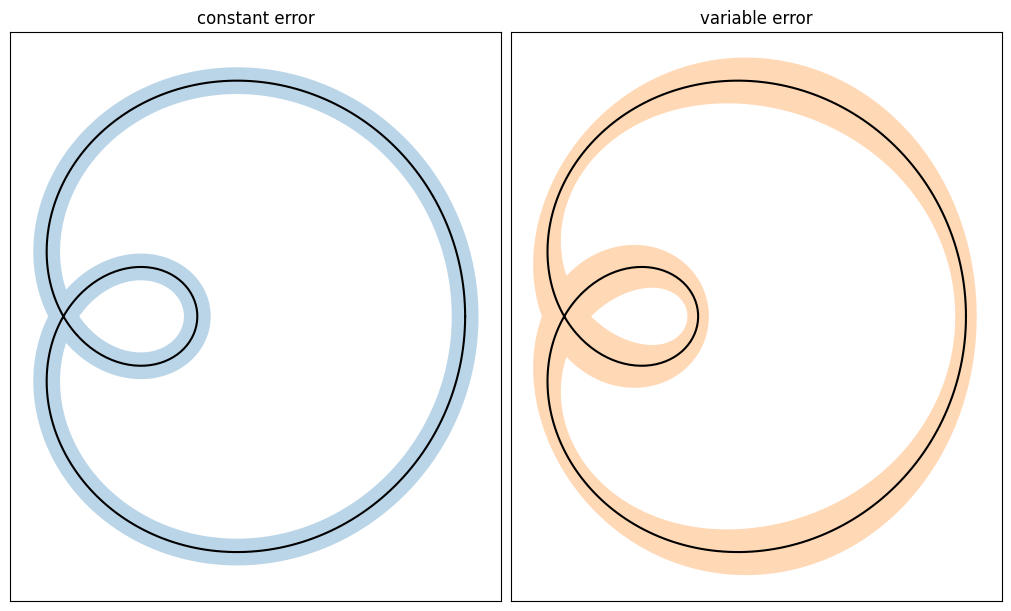

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import PathPatch
from matplotlib.path import Path

N = 400
t = np.linspace(0, 2 * np.pi, N)
r = 0.5 + np.cos(t)
x, y = r * np.cos(t), r * np.sin(t)

def draw_error_band(ax, x, y, err, **kwargs):
    # Calculate normals via centered finite differences (except the first point
    # which uses a forward difference and the last point which uses a backward
    # difference).
    dx = np.concatenate([[x[1] - x[0]], x[2:] - x[:-2], [x[-1] - x[-2]]])
    dy = np.concatenate([[y[1] - y[0]], y[2:] - y[:-2], [y[-1] - y[-2]]])
    l = np.hypot(dx, dy)
    nx = dy / l
    ny = -dx / l

    # end points of errors
    xp = x + nx * err
    yp = y + ny * err
    xn = x - nx * err
    yn = y - ny * err

    vertices = np.block([[xp, xn[::-1]],
                         [yp, yn[::-1]]]).T
    codes = np.full(len(vertices), Path.LINETO)
    codes[0] = codes[len(xp)] = Path.MOVETO
    path = Path(vertices, codes)
    ax.add_patch(PathPatch(path, **kwargs))


_, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(10, 10))
errs = [
    (axs[0], "constant error", 0.05),
    (axs[1], "variable error", 0.05 * np.sin(2 * t) ** 2 + 0.04),
]
for i, (ax, title, err) in enumerate(errs):
    ax.set(title=title, aspect=1, xticks=[], yticks=[])
    ax.plot(x, y, "k")
    draw_error_band(ax, x, y, err=err,
                    facecolor=f"C{i}", edgecolor="none", alpha=.3)
    
    ax.set_facecolor('none')  # Set axes background to transparent

plt.show()

#% title="Plot with error bands"

<Axes: >

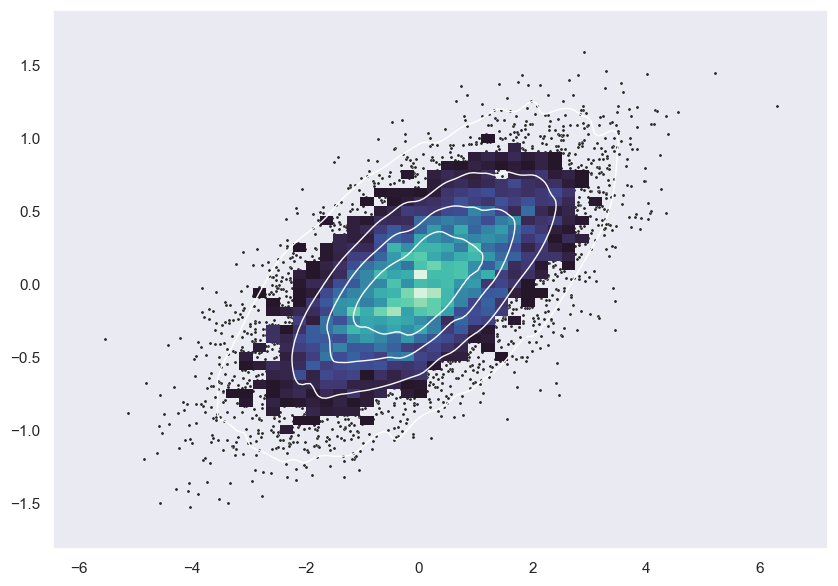

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(10, 7))

f.patch.set_alpha(0.0)
ax.set_alpha(0.5)
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

In [1]:
import numpy as np
import pandas as pd

dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

#% title="A DataFrame packed with information"

,A,B,C,D
2013-01-01,2.680860,-1.422334,-0.702262,0.267985
2013-01-02,-0.212013,-0.660518,-0.037430,0.096065
2013-01-03,-0.844791,0.121855,-1.644785,-0.793636
2013-01-04,0.129759,-0.047782,-0.296256,-1.693386
2013-01-05,1.185204,0.717236,-2.060969,0.603855
2013-01-06,0.075380,-2.020066,0.156442,-0.121374
